In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from dentate.plot import *
%cd /Users/milsteina/PycharmProjects/dentate

('dentate.plot: problem importing module required by dentate.geometry:', ModuleNotFoundError("No module named 'rbf.basis'"))
/Users/milsteina/PycharmProjects/dentate


INFO:dentate.spikedata:Reading spike data for population LPP in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 4926 spikes for population LPP
INFO:dentate.spikedata:Reading spike data for population MPP in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 9885 spikes for population MPP
INFO:dentate.spikedata:Reading spike data for population MOPP in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 3335 spikes for population MOPP
INFO:dentate.spikedata:Reading spike data for population NGFC in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 4076 spikes for population NGFC
INFO:dentate.spikedata:Reading spike data for population HCC in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 3458 spikes for population HCC
INFO:dentate.spikedata:Reading spike data for population AAC in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 731 spikes for population AAC
INFO:dentate.spikedata:Reading spike data for population BC in time range [0.0, 9000.

<IPython.core.display.Javascript object>


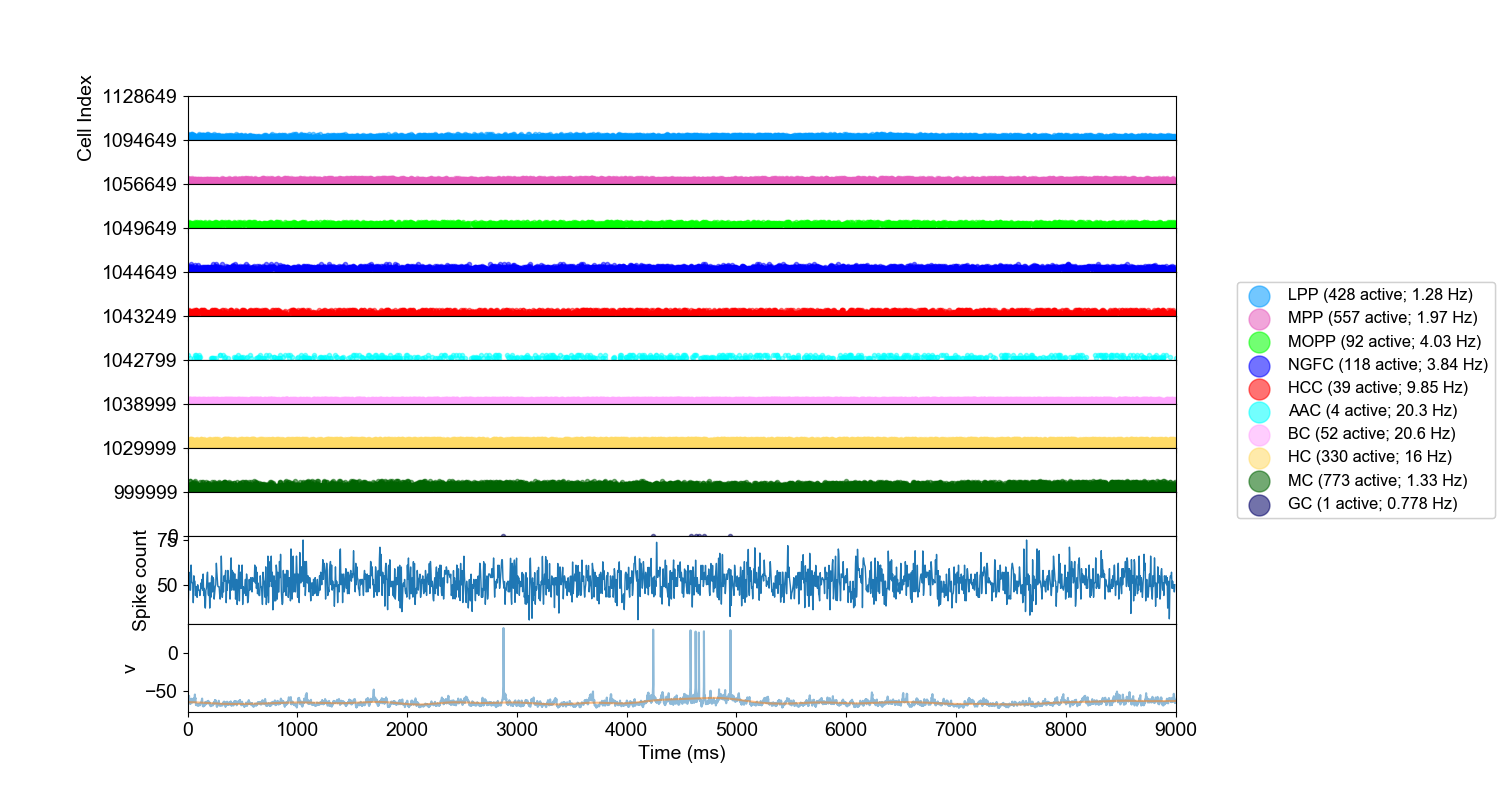

In [2]:
%run scripts/plot_network_clamp.py -v --unit-no 0 --t-max=9000. --interactive -p data/single_GC_0/Single_GC_Exc_Sat_DD_NDW_0_results_91958360-812b-491f-94ba-622c08beaf91.h5

In [3]:
locals().update(context())

In [4]:
# input_path='data/single_GC_0/Single_GC_Exc_Sat_DD_SW_0_results_dbcaa02e-e7a8-4040-9a5d-c20ac63ab6c7.h5'
include = populations
time_variable = t_variable
intracellular_variable = state_variable
spike_hist='subplot'
kwargs = {'fontSize': font_size, 'saveFig': False}

intracellular_namespace = state_namespace
labels='legend'
pop_rates=True
marker=','

INFO:dentate.spikedata:Reading spike data for population LPP in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 4926 spikes for population LPP
INFO:dentate.spikedata:Reading spike data for population MPP in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 9885 spikes for population MPP
INFO:dentate.spikedata:Reading spike data for population MOPP in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 3335 spikes for population MOPP
INFO:dentate.spikedata:Reading spike data for population NGFC in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 4076 spikes for population NGFC
INFO:dentate.spikedata:Reading spike data for population HCC in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 3458 spikes for population HCC
INFO:dentate.spikedata:Reading spike data for population AAC in time range [0.0, 9000.0]...
INFO:dentate.spikedata: Read 731 spikes for population AAC
INFO:dentate.spikedata:Reading spike data for population BC in time range [0.0, 9000.

<IPython.core.display.Javascript object>


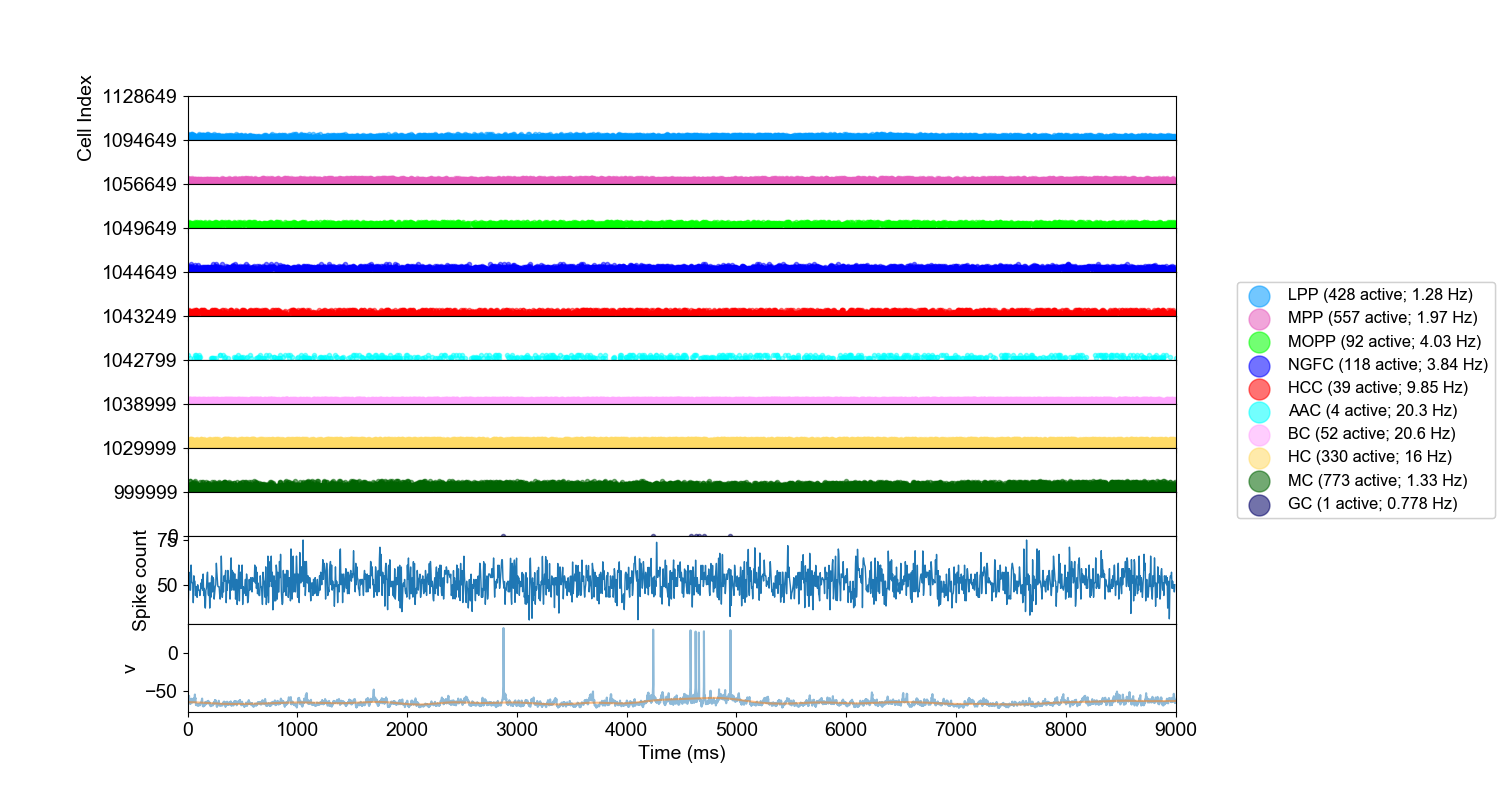

In [5]:
fig_options = copy.copy(default_fig_options)
fig_options.update(kwargs)

(population_ranges, N) = read_population_ranges(input_path)
population_names = read_population_names(input_path)

popName = None
pop_num_cells = {}
pop_start_inds = {}
for k in population_names:
    pop_start_inds[k] = population_ranges[k][0]
    pop_range = population_ranges[k]
    pop_num_cells[k] = pop_range[1]
    if (unit_no >= pop_range[0]) and (unit_no < pop_range[0] + pop_range[1]):
        popName = k

include = list(include)
# Replace 'eachPop' with list of populations
if 'eachPop' in include:
    include.remove('eachPop')
    for pop in population_names:
        include.append(pop)

# sort according to start index
include.sort(key=lambda x: pop_start_inds[x])
include.reverse()

spkdata = spikedata.read_spike_events(input_path, include, spike_namespace, \
                                      spike_train_attr_name=time_variable, time_range=time_range)
indata = read_state(input_path, [popName], intracellular_namespace, time_variable=time_variable, \
                    state_variable=intracellular_variable, time_range=time_range, unit_no=[unit_no])

spkpoplst = spkdata['spkpoplst']
spkindlst = spkdata['spkindlst']
spktlst = spkdata['spktlst']
num_cell_spks = spkdata['num_cell_spks']
pop_active_cells = spkdata['pop_active_cells']
tmin = spkdata['tmin']
tmax = spkdata['tmax']

if time_range is None:
    time_range = [tmin, tmax]

if time_range[0] == time_range[1] or time_range[0] == float('inf') or time_range[1] == float('inf'):
    raise RuntimeError('plot_network_clamp: invalid time_range: %s' % time_range)

histo_dict = {}
# Calculate spike histogram if requested
if spike_hist:
    if spktlst:
        all_spkts = np.concatenate(spktlst, axis=0)
    else:
        all_spkts = np.array([])
    sphist_y, bin_edges = np.histogram(all_spkts, bins=np.arange(time_range[0], time_range[1], spike_hist_bin))
    sphist_x = bin_edges[:-1] + (spike_hist_bin / 2)

maxN = 0
minN = N

avg_rates = {}
tsecs = ((time_range[1] - time_range[0]) / 1e3)
for i, pop_name in enumerate(spkpoplst):
    pop_num = len(pop_active_cells[pop_name])
    maxN = max(maxN, max(pop_active_cells[pop_name]))
    minN = min(minN, min(pop_active_cells[pop_name]))
    if pop_num > 0:
        if num_cell_spks[pop_name] == 0:
            avg_rates[pop_name] = 0
        else:
            avg_rates[pop_name] = (num_cell_spks[pop_name] / pop_num) / tsecs

pop_colors = {pop_name: dflt_colors[ipop % len(dflt_colors)] for ipop, pop_name in enumerate(spkpoplst)}

pop_spk_dict = {pop_name: (pop_spkinds, pop_spkts) for (pop_name, pop_spkinds, pop_spkts) in
                zip(spkpoplst, spkindlst, spktlst)}

# Plot spikes
if spike_hist is None:
    fig, axes = plt.subplots(nrows=len(spkpoplst) + 1, sharex=True, figsize=fig_options.figSize,
                             gridspec_kw={'height_ratios': [1] * len(spkpoplst) + [2]})
elif spike_hist == 'subplot':
    fig, axes = plt.subplots(nrows=len(spkpoplst) + 2, sharex=True, figsize=fig_options.figSize,
                             gridspec_kw={'height_ratios': [1] * len(spkpoplst) + [2, 2]})

sctplots = []

for i, pop_name in enumerate(include):
    pop_spkinds, pop_spkts = pop_spk_dict.get(pop_name, ([], []))

    # sctplots.append(axes[i].scatter(pop_spkts, pop_spkinds, s=10, linewidths=fig_options.lw, marker=marker,
    #       c=pop_colors.get(pop_name, dflt_colors[0]), alpha=0.5, label=pop_name))
    sctplots.append(axes[i].scatter(pop_spkts, pop_spkinds, marker='.',
                                    c=pop_colors.get(pop_name, dflt_colors[0]), alpha=0.5, label=pop_name))

    N = pop_num_cells[pop_name]
    S = pop_start_inds[pop_name]
    axes[i].set_ylim(S, S + N - 1)

axes[0].set_xlim(time_range)
axes[0].set_xlabel('Time (ms)', fontsize=fig_options.fontSize)
axes[0].set_ylabel('Cell Index', fontsize=fig_options.fontSize)

axes[0].tick_params(axis='x', which='major', labelsize=fig_options.fontSize)
axes[0].tick_params(axis='x', which='minor', labelsize=fig_options.fontSize)

fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-2]], visible=False)

# set raster plot ticks to the end of the index range for each population
for i, pop_name in enumerate(include):
    a = fig.axes[i]
    start, end = a.get_ylim()
    a.get_yaxis().set_ticks([end])

# set raster plot ticks to start and end of index range for first population
a = fig.axes[len(include) - 1]
start, end = a.get_ylim()
a.get_yaxis().set_ticks([start, end])

if pop_rates:
    lgd_labels = [pop_name + ' (%i active; %.3g Hz)' % (len(pop_active_cells[pop_name]), avg_rates[pop_name]) for
                  pop_name in spkpoplst if pop_name in avg_rates]
else:
    lgd_labels = [pop_name + ' (%i active)' % (len(pop_active_cells[pop_name])) for pop_name in spkpoplst if
                  pop_name in avg_rates]

try:
    # Plot spike histogram
    pch = interpolate.pchip(sphist_x, sphist_y)
    res_npts = int((sphist_x.max() - sphist_x.min()))
    sphist_x_res = np.linspace(sphist_x.min(), sphist_x.max(), res_npts, endpoint=True)
    sphist_y_res = pch(sphist_x_res)

    if spike_hist == 'overlay':
        ax2 = axes[-2].twinx()
        ax2.plot(sphist_x_res, sphist_y_res, linewidth=0.5)
        ax2.set_ylabel('Spike count', fontsize=fig_options.fontSize)  # add yaxis label in opposite side
        ax2.set_xlim(time_range)
    elif spike_hist == 'subplot':
        ax2 = axes[-2]
        ax2.plot(sphist_x_res, sphist_y_res, linewidth=1.0)
        ax2.set_xlabel('Time (ms)', fontsize=fig_options.fontSize)
        ax2.set_ylabel('Spike count', fontsize=fig_options.fontSize)
        ax2.set_xlim(time_range)
except Exception:
    pass

# Plot intracellular state
ax3 = axes[-1]
ax3.set_xlabel('Time (ms)', fontsize=fig_options.fontSize)
ax3.set_ylabel(intracellular_variable, fontsize=fig_options.fontSize)
ax3.set_xlim(time_range)

states = indata['states']
stplots = []
from dentate.utils import get_low_pass_filtered_trace
for (pop_name, pop_states) in viewitems(states):
    for (gid, cell_states) in viewitems(pop_states):
        st_x = cell_states[0]
        st_y = cell_states[1]
        """
        pch = interpolate.pchip(st_x, st_y)
        res_npts = int((st_x.max() - st_x.min())) * 10
        st_x_res = np.linspace(st_x.min(), st_x.max(), res_npts, endpoint=True)
        st_y_res = pch(st_x_res)
        stplots.append(ax3.plot(st_x_res, st_y_res, linewidth=fig_options.lw, marker=marker, alpha=0.5, 
            label=pop_name))
        """
        filtered_st_y = get_low_pass_filtered_trace(st_y, st_x)
        stplots.append(
            ax3.plot(st_x, st_y, label=pop_name, alpha=0.5))
        stplots.append(
            ax3.plot(st_x, filtered_st_y, label='%s (filtered)' % pop_name, alpha=0.5))

if labels == 'legend':
    # Shrink axes by 15%
    for ax in axes:
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.85, box.height])
    # Add legend
    lgd = fig.legend(sctplots, lgd_labels, loc='center right',
                     fontsize='small', scatterpoints=1, markerscale=5.,
                     bbox_to_anchor=(1.002, 0.5), bbox_transform=plt.gcf().transFigure)
    fig.artists.append(lgd)

elif labels == 'overlay':
    for i, (pop_name, lgd_label) in enumerate(zip(spkpoplst, lgd_labels)):
        at = AnchoredText(lgd_label, loc='upper right', borderpad=0.01, prop=dict(size=fig_options.fontSize))
        axes[i].add_artist(at)
    max_label_len = max([len(l) for l in lgd_labels])
show_figure()

<IPython.core.display.Javascript object>


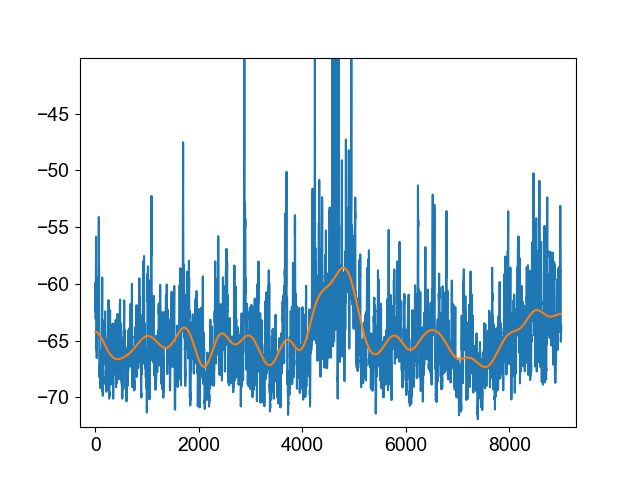

In [6]:
plt.figure()
plt.plot(st_x, st_y)
plt.plot(st_x, filtered_st_y)